In [64]:
import pandas as pd

In [65]:
train  = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (1460, 81)
test shape: (1459, 80)


In [66]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

       price  log(price + 1)
0     208500       12.247699
1     181500       12.109016
2     223500       12.317171
3     140000       11.849405
4     250000       12.429220
...      ...             ...
1455  175000       12.072547
1456  210000       12.254868
1457  266500       12.493133
1458  142125       11.864469
1459  147500       11.901590

[1460 rows x 2 columns] ¥n
price skew  : 1.880940746034036
log(price + 1) skew: 0.12122191311528359


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

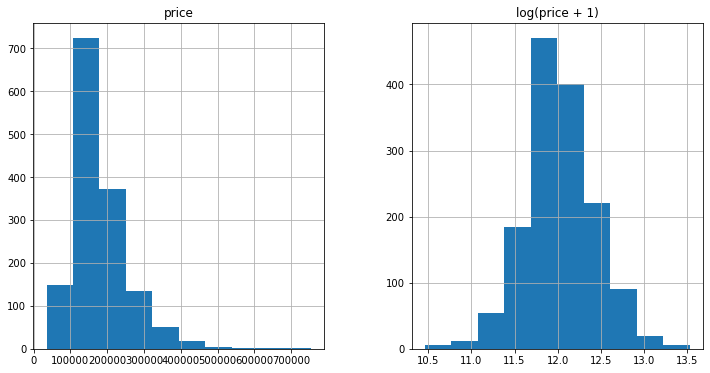

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

prices = pd.DataFrame({'price' : train['SalePrice'],
                      'log(price + 1)': np.log1p(train['SalePrice'])})#底をeとするx+1の対数

print(prices, '¥n')

print('price skew  :', skew(prices['price']))
print('log(price + 1) skew:', skew(prices['log(price + 1)']))

plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices.hist() #歪度

In [69]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [70]:
max(train['SalePrice'])

755000

In [71]:
max(np.log1p(train['SalePrice']))

13.534474352733596

In [54]:
np.log1p(train['SalePrice']).mean()

2.566328531215135

In [ ]:
np.log1p(train['SalePrice']).mean()

In [14]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [15]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                                  test.loc[:,'MSSubClass':'SaleCondition']))

print(all_data.shape)
print(all_data)

(2919, 79)
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    In

In [16]:
#数値型のカラムで歪度が0.75を超える場合は対数変換する
from scipy.stats import skew
#object型ではないカラムのインデックスを取得
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print('--Column of non-object type--')
print(numeric_feats)

--Column of non-object type--
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [20]:
#object型ではないカラムの歪度を欠損値を除いてから求める
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
print('--skewed_feats--')
print(skewed_feats)

# def func(x)：
# 　　return skew(x.dropna())

--skewed_feats--
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: floa

In [21]:
skewed_feats = skewed_feats[skewed_feats > 0.75]
print("--Skewness greater than 0.75--")
print(skewed_feats)

--Skewness greater than 0.75--
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64


In [22]:
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data[skewed_feats]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1455,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,...,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.454347,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,...,6.878326,0.693147,0.693147,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


In [26]:
train['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [28]:
cc_data = pd.get_dummies(train['LotShape'])
cc_data[:20]

,IR1,IR2,IR3,Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,0,1
7,1,0,0,0
8,0,0,0,1
9,0,0,0,1


In [29]:
cc_data['LotShape'] = train['LotShape']
cc_data[:20]

,IR1,IR2,IR3,Reg,LotShape
0,0,0,0,1,Reg
1,0,0,0,1,Reg
2,1,0,0,0,IR1
3,1,0,0,0,IR1
4,1,0,0,0,IR1
5,1,0,0,0,IR1
6,0,0,0,1,Reg
7,1,0,0,0,IR1
8,0,0,0,1,Reg
9,0,0,0,1,Reg


In [31]:
all_data = pd.get_dummies(all_data)
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
all_data = all_data.fillna(all_data[:train.shape[0]].mean())

In [33]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,1,0,0,0,0,1,0


In [36]:
#リッジ回帰
# X_train = all_data[:train.shape[0]]
# X_test = all_data[train.shape[0]:]
# train.shape[0]
train.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [37]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [38]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(
                -cross_val_score(
                  model, X_train, y,
                  scoring= "neg_mean_squared_error",
                  cv = 5))
    return(rmse)

In [39]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.5, 1, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
                  for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

print('Ridge RMSE loss:')
print(cv_ridge, '¥n')

print('Ridge RMSE loss Mean')
print(cv_ridge.mean())

Ridge RMSE loss:
0.05     0.138937
0.10     0.137777
0.50     0.133467
1.00     0.131362
5.00     0.127821
10.00    0.127337
15.00    0.127529
30.00    0.128958
50.00    0.130994
75.00    0.133163
dtype: float64 ¥n
Ridge RMSE loss Mean
0.13173438128730325


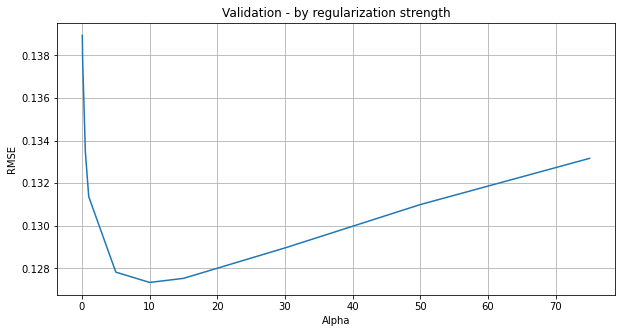

In [40]:
plt.figure(figsize = (10, 5))
plt.plot(cv_ridge)
plt.grid()
plt.title('Validation - by regularization strength')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

In [41]:
#ラッソ回帰
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(
                       alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

print('Lasso regression RMSE loss')
print(rmse_cv(model_lasso))

print('Average loss:', rmse_cv(model_lasso).mean())
print('Minimum loss:', rmse_cv(model_lasso).min())
print('Best alpha :', model_lasso.alpha_)

Lasso regression RMSE loss
[0.10330995 0.13147299 0.12552458 0.10530461 0.14723333]
Average loss: 0.12256909294467003
Minimum loss: 0.1033099507189645
Best alpha : 0.0005


In [45]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)

params = {"max_depth":3, "eta":0.1}

cross_val = xgb.cv(
                  params,
                  dtrain,
                  num_boost_round = 1000,
                  early_stopping_rounds = 50)

cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380516,0.003151,10.380511,0.007227
1,9.345150,0.002915,9.345144,0.007586
2,8.413392,0.002710,8.413386,0.007926
3,7.574889,0.002511,7.575220,0.007951
4,6.820173,0.002320,6.820488,0.007688
...,...,...,...,...
405,0.040728,0.000315,0.125469,0.013440
406,0.040664,0.000320,0.125464,0.013418
407,0.040607,0.000326,0.125434,0.013416
408,0.040534,0.000332,0.125432,0.013409


In [46]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)

params = {"max_depth":3, "eta":0.1}

cross_val = xgb.cv(
                  params,
                  dtrain,
                  num_boost_round = 1000,
                  early_stopping_rounds = 50)

cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380516,0.003151,10.380511,0.007227
1,9.345150,0.002914,9.345144,0.007586
2,8.413392,0.002710,8.413386,0.007926
3,7.574888,0.002511,7.575220,0.007951
4,6.820173,0.002320,6.820488,0.007688
...,...,...,...,...
405,0.040728,0.000315,0.125469,0.013440
406,0.040664,0.000320,0.125464,0.013418
407,0.040607,0.000326,0.125434,0.013416
408,0.040534,0.000332,0.125432,0.013409


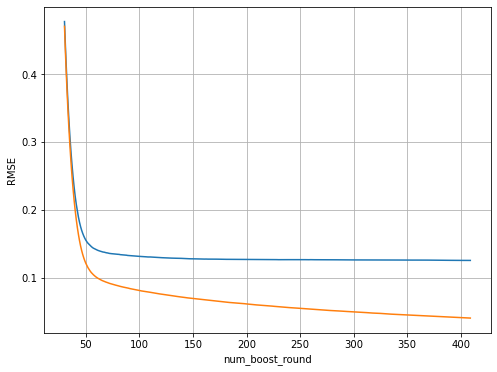

In [47]:
plt.figure(figsize = (8, 6))
plt.plot(cross_val.loc[30:, ["test-rmse-mean", "train-rmse-mean"]])
plt.grid()
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

In [48]:
model_xgb = xgb.XGBRegressor(
                     n_estimators = 410,
                     max_depth = 3,
                     learning_rate = 0.1)
model_xgb.fit(X_train, y)
print('xgboost RMSE loss:')
print(rmse_cv(model_xgb).mean())

xgboost RMSE loss:
0.12437590040488114


In [50]:
lasso_preds = np.expm1(model_lasso.predict(X_test))
xgb_preds = np.expm1(model_xgb.predict(X_test))

In [51]:
preds= lasso_preds * 0.7 + xgb_preds * 0.3

In [52]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)